Correlation (Freq Use vs Complex): -0.00


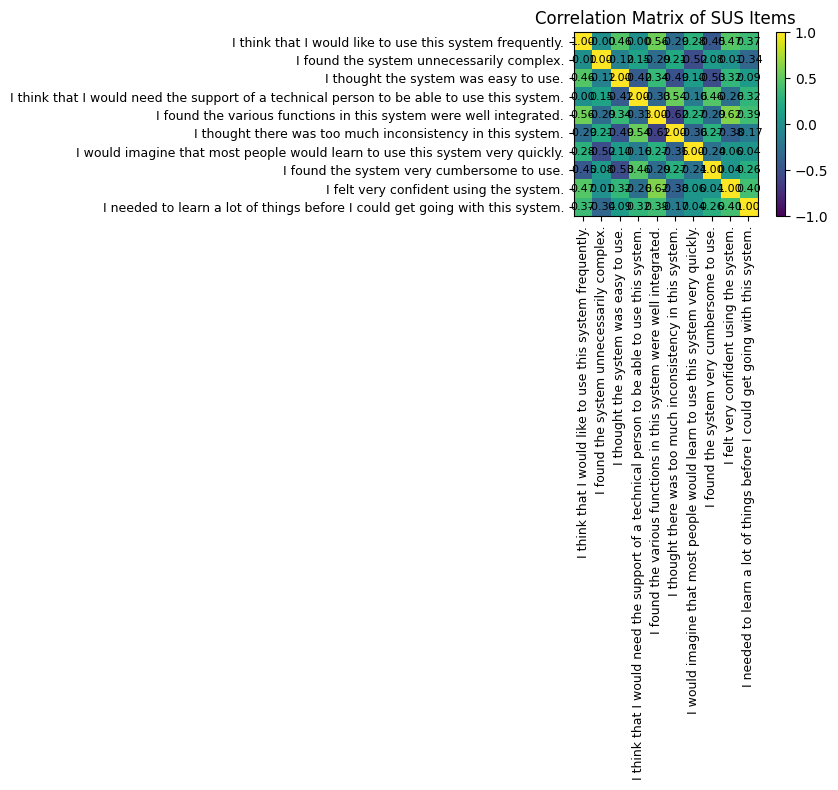

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ——— 1) Load & clean SUS item columns ———
df = pd.read_csv('sus.csv', sep=';', encoding='latin1', decimal=',')
exclude = [
    '$submission_id', '$created', 'First name', 'Control Setup',
    '$answer_time_ms', 'Odd item sum', 'Even item sum', 'SUS SCORE'
]
item_cols = [c for c in df.columns if c not in exclude]
for col in item_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ——— 2) Compute correlation matrix ———
corr = df[item_cols].corr()

# ——— 3) Print the Freq Use ↔ Complex coefficient ———
r = corr.loc['I think that I would like to use this system frequently.', 'I found the system unnecessarily complex.']
print(f"Correlation (Freq Use vs Complex): {r:.2f}")

# ——— 4) Plot heatmap of all correlations ———
fig, ax = plt.subplots(figsize=(10, 8))
# show correlation values between –1 and +1
cax = ax.imshow(corr, vmin=-1, vmax=1)

# colorbar
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# tick labels
ax.set_xticks(np.arange(len(item_cols)))
ax.set_yticks(np.arange(len(item_cols)))
ax.set_xticklabels(item_cols, rotation=90, ha='center', fontsize=9)
ax.set_yticklabels(item_cols, fontsize=9)

# annotate each cell with the numeric value
for i in range(len(item_cols)):
    for j in range(len(item_cols)):
        ax.text(
            j, i,
            f"{corr.values[i, j]:.2f}",
            ha='center', va='center', fontsize=8
        )

ax.set_title('Correlation Matrix of SUS Items', fontsize=12)
plt.tight_layout()
plt.show()


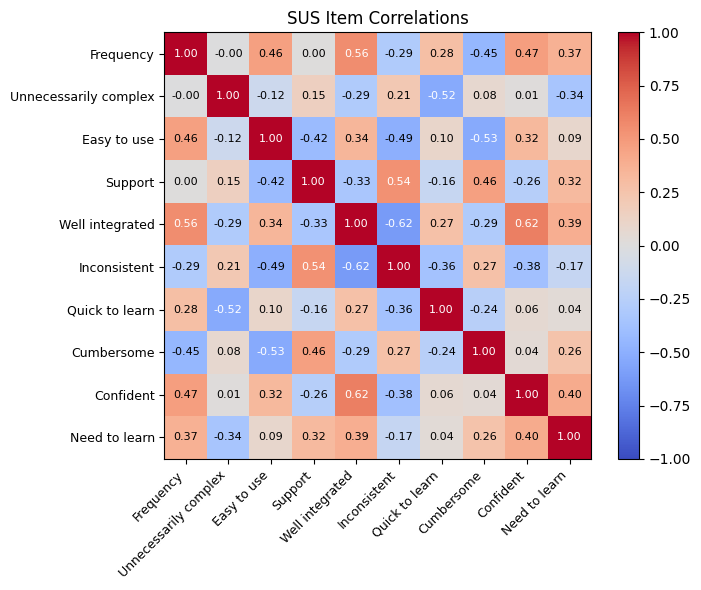

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ——— 1) Load & clean SUS item columns ———
df = pd.read_csv('sus.csv', sep=';', encoding='latin1', decimal=',')
exclude = [
    '$submission_id', '$created', 'First name', 'Control Setup',
    '$answer_time_ms', 'Odd item sum', 'Even item sum', 'SUS SCORE'
]
item_cols = [c for c in df.columns if c not in exclude]
for col in item_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ——— 2) Compute correlation matrix ———
corr = df[item_cols].corr()

# ——— 3) Define your short labels ———
short = {
    'I think that I would like to use this system frequently.':
        'Frequency',
    'I found the system unnecessarily complex.':
        'Unnecessarily complex',
    'I thought the system was easy to use.':
        'Easy to use',
    'I think that I would need the support of a technical person to be able to use this system.':
        'Support',
    'I found the various functions in this system were well integrated.':
        'Well integrated',
    'I thought there was too much inconsistency in this system.':
        'Inconsistent',
    'I would imagine that most people would learn to use this system very quickly.':
        'Quick to learn',
    'I found the system very cumbersome to use.':
        'Cumbersome',
    'I felt very confident using the system.':
        'Confident',
    'I needed to learn a lot of things before I could get going with this system.':
        'Need to learn'
}


# ——— 4) Rename the axes of the correlation matrix ———
corr_short = corr.rename(index=short, columns=short)

# ——— 5) Plot heatmap with short labels ———
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(corr_short, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Put the short labels on the ticks
labels = list(corr_short.columns)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(labels, fontsize=9)

# Annotate each cell with its correlation value
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(
            j, i,
            f"{corr_short.values[i, j]:.2f}",
            ha='center', va='center', fontsize=8,
            color='white' if abs(corr_short.values[i, j])>0.5 else 'black'
        )

ax.set_title('SUS Item Correlations', fontsize=12)
plt.tight_layout()
plt.show()


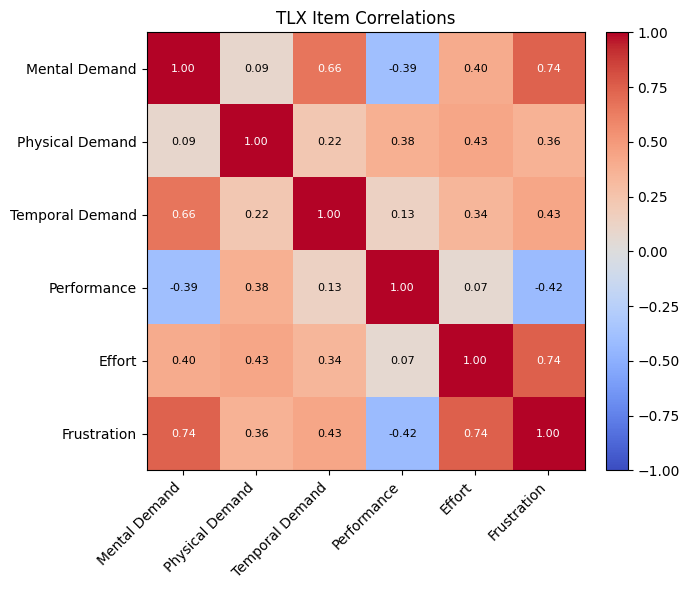

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ——— 1) Load & clean TLX item columns ———
df = pd.read_csv(
    'tlx.csv',        # or your exact filename
    sep=';',
    encoding='latin1',
    decimal=','       # parse “12,5” → 12.5
)

# ——— 2) Identify only the TLX dimensions ———
exclude = [
    '$submission_id', '$created', 'First name', 'User',
    'Control Setup', '$answer_time_ms', 'SCORE', 'TLX SCORE'
]
item_cols = [c for c in df.columns if c not in exclude]

# ——— 3) Ensure numeric ———
for col in item_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ——— 4) Compute correlation matrix ———
corr = df[item_cols].corr()

# ——— 5) Plot heatmap with true TLX labels ———
fig, ax = plt.subplots(figsize=(7, 6))
cax = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Put the actual column names on the ticks
labels = item_cols
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(labels, fontsize=10)

# Annotate each cell with its correlation
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(
            j, i,
            f"{corr.values[i, j]:.2f}",
            ha='center', va='center',
            fontsize=8,
            color='white' if abs(corr.values[i, j]) > 0.5 else 'black'
        )

ax.set_title('TLX Item Correlations', fontsize=12)
plt.tight_layout()
plt.show()
